In this file I will be applying the rotated 2D flat topped Gaussian that I worked on in the file MAKING_GAUSSIAN_MODEL.

I will do it tilted and not tilted to compare the two and ensure the tilting is working!

In [1]:
from mpl_toolkits.mplot3d import Axes3D

from scipy.interpolate import griddata

from collections import defaultdict

import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [2]:
%run run_all_intro_stuff.py

# Picking $\theta$

In [3]:
# Generate x values
x_values_test = np.linspace(-5, 5, 100)

# Generate y values
y_values_test = np.linspace(-6, 6, 100)

In [4]:
# Store the computed values
gaussian_2d_flat_tilted = {}
gaussian_slices_x_tilted = {}
gaussian_slices_y_tilted = {}
X_rot_arr = {}
Y_rot_arr = {}

phi_values = [2, 2, 2, 2, 2, 2]  # Increasing phi makes it flatter
theta_rad_values = np.radians([45, 90, 135, 180, major_angle_deg_cartesian, minor_angle_deg_cartesian])  # Corrected syntax

# Compute and store the data
for phi, theta_rad in zip(phi_values, theta_rad_values):
    gaussian_2d_tilted, X_rot, Y_rot = calculate_gaussian_2d_flat_tilted(x_values_test, y_values_test, 2, 3, 0, 0, phi, theta_rad)

    # Store using (phi, theta) as the key
    gaussian_2d_flat_tilted[(phi, theta_rad)] = gaussian_2d_tilted.copy()
    
    X_rot_arr[(phi, theta_rad)] = X_rot.copy()
    Y_rot_arr[(phi, theta_rad)] = Y_rot.copy()
    
    gaussian_slices_x_tilted[(phi, theta_rad)] = gaussian_2d_tilted[50, :].copy()
    gaussian_slices_y_tilted[(phi, theta_rad)] = gaussian_2d_tilted[:, 50].copy()

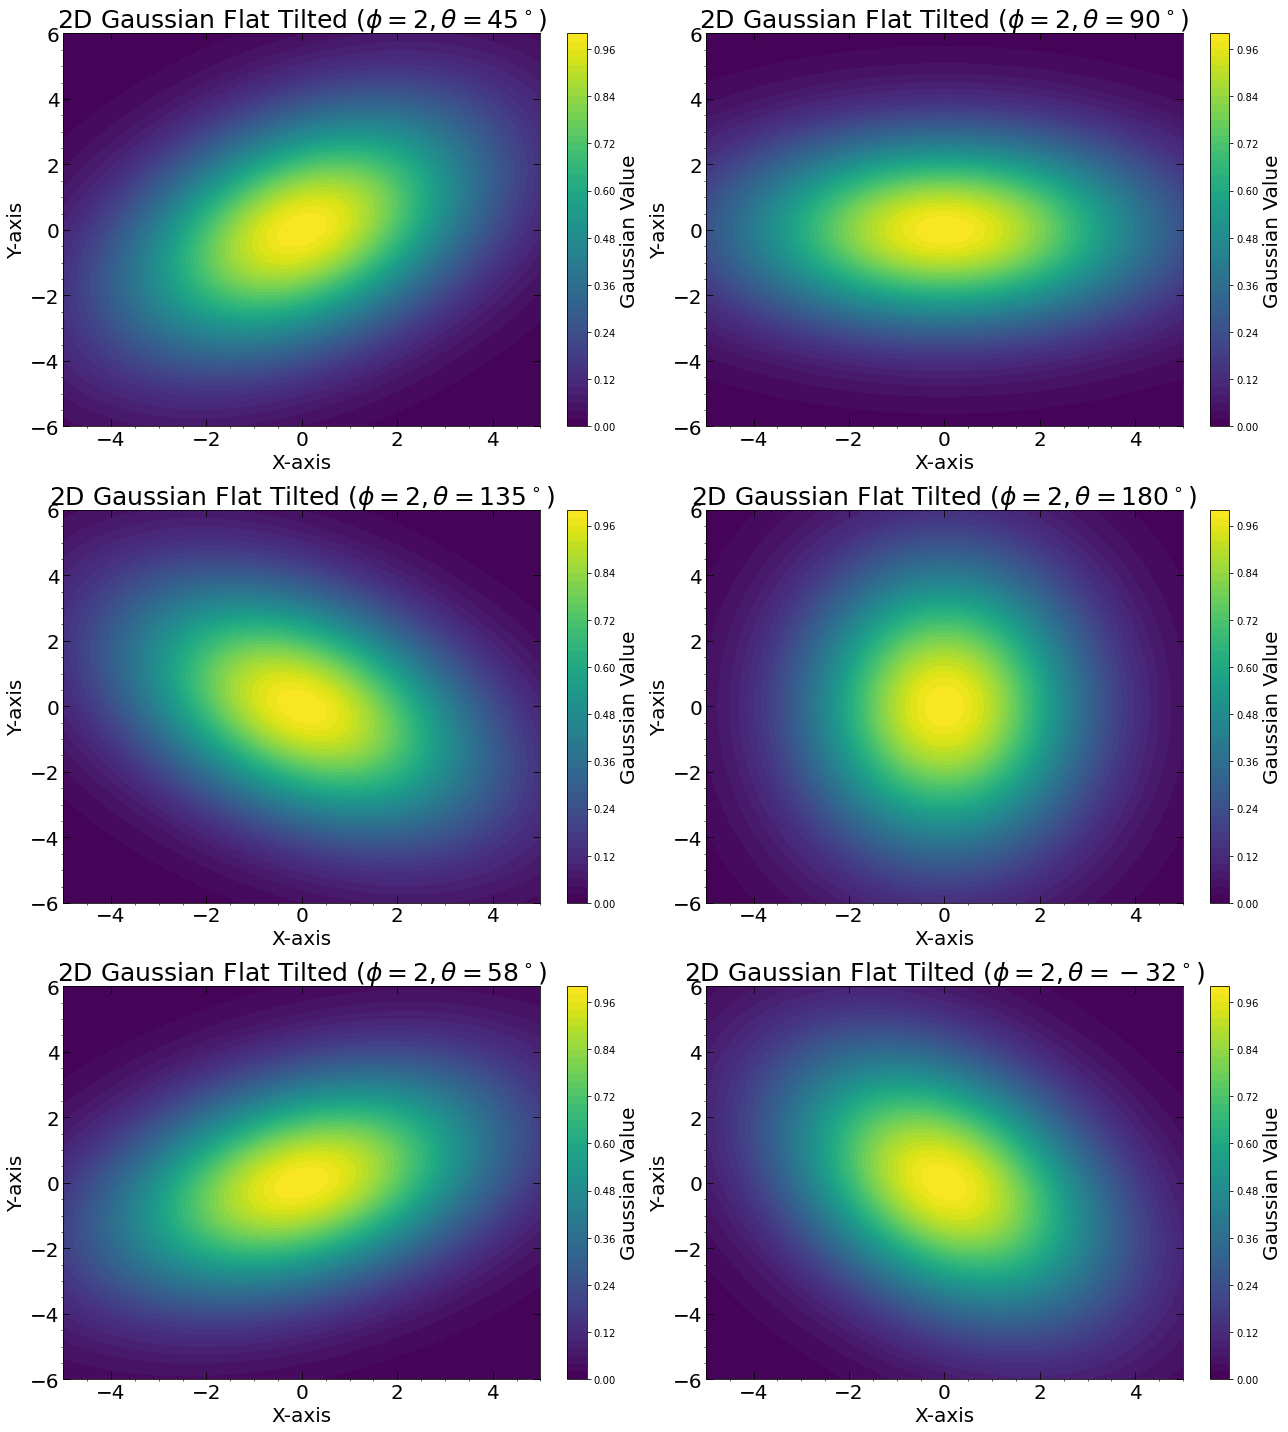

In [5]:
# Create subplots: 2D Gaussian contours (2x2 grid)
fig, ax = plt.subplots(3, 2, figsize=(18, 20))  
ax = ax.flatten()


i = 0 

# Plot the 2D Gaussian grids
for phi, theta_rad in zip(phi_values, theta_rad_values):
    
    gaussian_2d = gaussian_2d_flat_tilted[(phi, theta_rad)]
    
    
    x_values_rot = X_rot_arr[(phi, theta_rad)][50, :]
    y_values_rot = Y_rot_arr[(phi, theta_rad)][:, 50]
    
    contour = ax[i].contourf(x_values_test, y_values_test, gaussian_2d, 50, cmap='viridis')
    cbar = fig.colorbar(contour, ax=ax[i], orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_label('Gaussian Value', fontsize=cbar_fs)
    
    ax[i].set_title(fr'2D Gaussian Flat Tilted ($\phi={phi}, \theta={theta_rad * 180/np.pi:.0f}^\circ$)', fontsize=title_fs)
    ax[i].set_xlabel('X-axis', fontsize=axis_label_fs)
    ax[i].set_ylabel('Y-axis', fontsize=axis_label_fs)
    ax[i].minorticks_on()
    ax[i].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[i].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)
    
    i = i + 1

plt.tight_layout()
plt.show()


# Changing $\phi$, $\sigma_x$ and $\sigma_y$

In [6]:
theta_rad = major_angle_rad_cartesian
# theta_rad = minor_angle_rad_cartesian

In [7]:
phi_values = [2, 3, 4, 5]

chi_values = []
vector_angles = []
all_values = []

When I look at it on the plot the BMAJ of the disk is really the BMIN of the gaussian and the BMAJ of gaussian is reallyt th

In [8]:
BMAJ_pix_values = np.array([10, 20, 30, 40, 50]) # + np.array(BMAJ_pix, dtype=int) 
BMIN_pix_values = np.array([10, 20, 30, 40, 50]) # + np.array(BMIN_pix, dtype=int)

# Print results
print(f'The BMAJ pix values we will test are: {BMAJ_pix_values}')
print(f'The BMIN pix values we will test are: {BMIN_pix_values}')

The BMAJ pix values we will test are: [10 20 30 40 50]
The BMIN pix values we will test are: [10 20 30 40 50]


In [9]:
# Dictionary to store results
results = {}

results_test = []
gaussian_save = []

for phi_val in phi_values: 
    for BMAJ_pix_val in BMAJ_pix_values:
        for BMIN_pix_val in BMIN_pix_values:
            
            # Run the gaussian model function
            # --------------------------------------------------------------------------------------------------------------------------------------------
            GaussianUniformRatios, GaussianAzimuthalRatios, _, _ = gaussian_2d_flat_topped_tilted_model(nx, ny, 
                                                                                                        theta_rad, phi_val, 
                                                                                                        BMIN_pix_val, BMAJ_pix_val, 
                                                                                                        RA_centre_pix, Dec_centre_pix)
            # --------------------------------------------------------------------------------------------------------------------------------------------
            
            


            # Recovere the Q, U and vector angle
            # --------------------------------------------------------------------------------------------------------------------------------------------
            _, _, _, vectors_data, vectors_angle = mix_StokesQU_and_generate_vectors(GaussianUniformRatios, GaussianAzimuthalRatios, 
                                                                                     StokesQ_grid_100Uniform, 
                                                                                     StokesU_grid_100Uniform,
                                                                                     StokesQ_grid_100Azimuthal, 
                                                                                     StokesU_grid_100Azimuthal,
                                                                                     ny, nx, 
                                                                                     step, vector_length_pix_const, 
                                                                                     StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                                                                     calculated_polarized_intensity, 
                                                                                     PolarizedIntensity_err_data_2d_mJy,
                                                                                     PolarizationAngle_err_data_2d_deg)
            # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
            # Create a key for the dictionary based on the values
            value_str = f"{int(phi_val)}_{int(BMAJ_pix_val)}_{int(BMIN_pix_val)}"  
    
            # Save the results in the dictionary
            results[f"vectors_data_{value_str}"] = vectors_data
            
            all_values.append((phi_val, BMAJ_pix_val, BMIN_pix_val))
            # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
           
    
    
            # Calculate and append chi squared 
            # --------------------------------------------------------------
            observed = vectors_angle
            expected = vector_angle_actual_same_length_astronomy

            chi_squared = calculate_chi_squared_v2(observed, expected)
        
            chi_values.append(chi_squared)
            
            
            results_test.append((phi_val, BMAJ_pix_val, BMIN_pix_val, chi_squared))
            gaussian_save.append(GaussianUniformRatios)
            # --------------------------------------------------------------
        

In [10]:
# Find the index of the minimum chi-squared value
min_index = chi_values.index(min(chi_values))

best_phi, best_BMAJ, best_BMIN = all_values[min_index]

In [11]:
# Print the results
print(f'The lowest chi-squared value is for phi = {best_phi:.2f}, BMAJ = {best_BMAJ:.2f}, and BMIN = {best_BMIN:.2f}: χ² = {chi_values[min_index]:.3f}')

The lowest chi-squared value is for phi = 5.00, BMAJ = 40.00, and BMIN = 30.00: χ² = 10.811


In [12]:
# Access the best vector data from the dictionary
best_key = f"vectors_data_{int(best_phi)}_{int(best_BMAJ)}_{int(best_BMIN)}"
vector_data_gaussian_best = results[best_key]

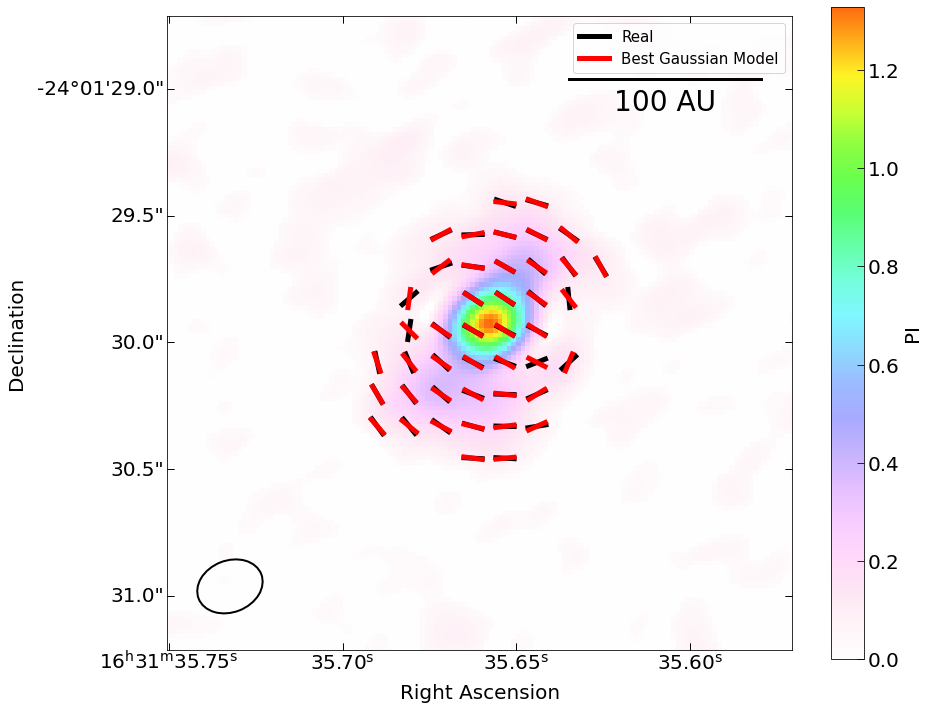

In [13]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'PI', soft_colormap_no_red, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

first_real = True
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Best Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)

### Plot a Gaussian

In [14]:
print(f'We have {len(all_values)} different options/runs to choose from')

We have 100 different options/runs to choose from


In [15]:
custom_indices = [1, 20]
custom_params = [all_values[i] for i in custom_indices]
gaussian_data = [gaussian_save[i] for i in custom_indices]

In [16]:
# # Unpack for individual reference if needed
# (custom_phi_1, custom_BMAJ_1, custom_BMIN_1), (custom_phi_2, custom_BMAJ_2, custom_BMIN_2) = custom_params

In [17]:
# Optional: print info for logging
for idx, (phi, BMAJ, BMIN) in zip(custom_indices, custom_params):
    print(f'For custom index {idx}: phi = {phi:.2f}, BMAJ = {BMAJ:.2f}, BMIN = {BMIN:.2f}')

For custom index 1: phi = 2.00, BMAJ = 10.00, BMIN = 20.00
For custom index 20: phi = 2.00, BMAJ = 50.00, BMIN = 10.00


In [18]:
# Generate x values
x_values = np.linspace(0, nx, nx)

# Generate y values
y_values = np.linspace(0, ny, nx)

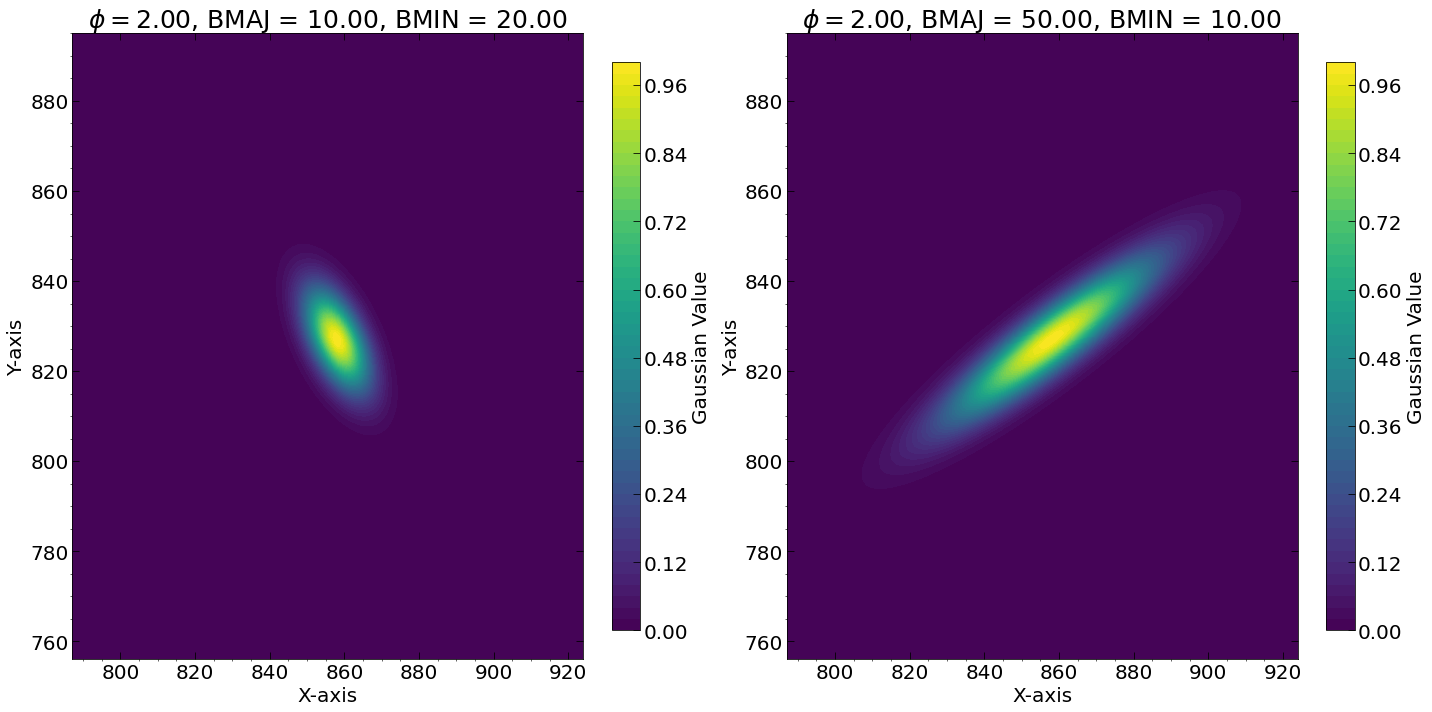

In [19]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax = ax.flatten()

# Create contour plots and add titles
for i in range(2):
    contour = ax[i].contourf(x_values, y_values, gaussian_data[i], 50, cmap='viridis')
    
    # Set title using values
    phi, BMAJ, BMIN = custom_params[i]
    ax[i].set_title(fr'$\phi = {phi:.2f}$, BMAJ = {BMAJ:.2f}, BMIN = {BMIN:.2f}', fontsize=title_fs)
    
    # Axes and colorbar setup (same as before)
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].set_xlabel('X-axis', fontsize=axis_label_fs)
    ax[i].set_ylabel('Y-axis', fontsize=axis_label_fs)
    ax[i].minorticks_on()
    ax[i].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[i].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)
    
    cbar = fig.colorbar(contour, ax=ax[i], orientation='vertical', fraction=0.05, pad=0.05)
    cbar.set_label('Gaussian Value', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")

plt.tight_layout()
plt.show()

## Look at 2D Contours

In [20]:
# Convert results into structured 2D arrays
phi_list, BMAJ_list, BMIN_list, chi_list = zip(*results_test)  # Unpack into separate lists

# Reshape into 2D grids (len(a_values) rows, len(b_values) columns)
# Reshape into 3D grids
phi_grid = np.array(phi_list).reshape(len(phi_values),   len(BMAJ_pix_values), len(BMIN_pix_values))
BMAJ_grid = np.array(BMAJ_list).reshape(len(phi_values), len(BMAJ_pix_values), len(BMIN_pix_values))
BMIN_grid = np.array(BMIN_list).reshape(len(phi_values), len(BMAJ_pix_values), len(BMIN_pix_values))
CHI_grid = np.array(chi_list).reshape(len(phi_values),   len(BMAJ_pix_values), len(BMIN_pix_values))

In [21]:
# Organize data
phi_dict = defaultdict(list)
bmaj_dict = defaultdict(list)
bmin_dict = defaultdict(list)

for phi, BMAJ, BMIN, chi in results_test:
    phi_dict[phi].append(chi)
    bmaj_dict[BMAJ].append(chi)
    bmin_dict[BMIN].append(chi)

# Compute averages
phi_avg = {phi: np.mean(chi_values) for phi, chi_values in phi_dict.items()}
bmaj_avg = {BMAJ: np.mean(chi_values) for BMAJ, chi_values in bmaj_dict.items()}
bmin_avg = {BMIN: np.mean(chi_values) for BMIN, chi_values in bmin_dict.items()}

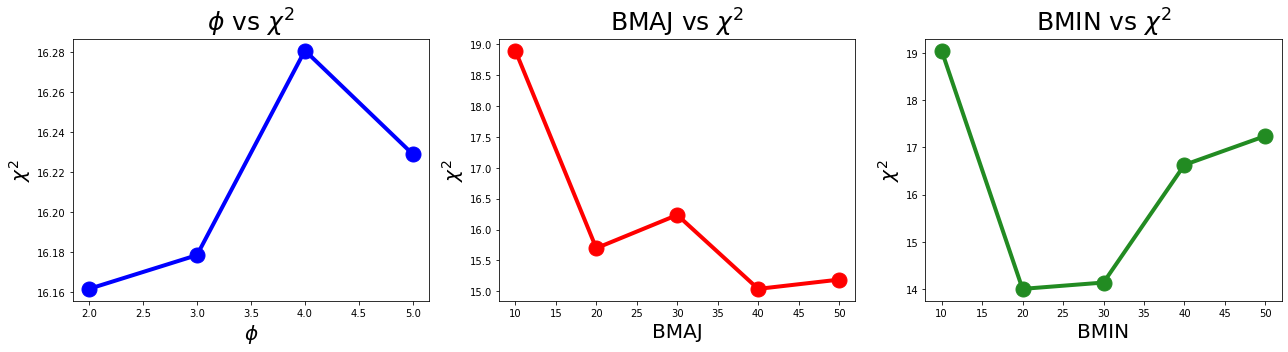

In [22]:
# Create figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot phi vs chi^2
axes[0].plot(list(phi_avg.keys()), list(phi_avg.values()), marker='o', linestyle='-', color = 'blue', lw = 4, ms = 15)
axes[0].set_xlabel(r'$\phi$', fontsize = axis_label_fs)
axes[0].set_ylabel(r'$\chi^2$', fontsize = axis_label_fs)
axes[0].set_title(r'$\phi$ vs $\chi^2$', fontsize = title_fs)

# Plot BMAJ vs chi^2
axes[1].plot(list(bmaj_avg.keys()), list(bmaj_avg.values()), marker='o', linestyle='-', color = 'red', lw = 4, ms = 15)
axes[1].set_xlabel('BMAJ', fontsize = axis_label_fs)
axes[1].set_ylabel(r'$\chi^2$', fontsize = axis_label_fs)
axes[1].set_title(r'BMAJ vs $\chi^2$', fontsize = title_fs)

# Plot BMIN vs chi^2
axes[2].plot(list(bmin_avg.keys()), list(bmin_avg.values()), marker='o', linestyle='-', color = 'forestgreen', lw = 4, ms = 15)
axes[2].set_xlabel('BMIN', fontsize = axis_label_fs)
axes[2].set_ylabel(r'$\chi^2$', fontsize = axis_label_fs)
axes[2].set_title(r'BMIN vs $\chi^2$', fontsize = title_fs)

plt.tight_layout()
plt.show()


In [23]:
# breakpoint() 

### Contours of BMAJ and BMIN with constant $\phi$

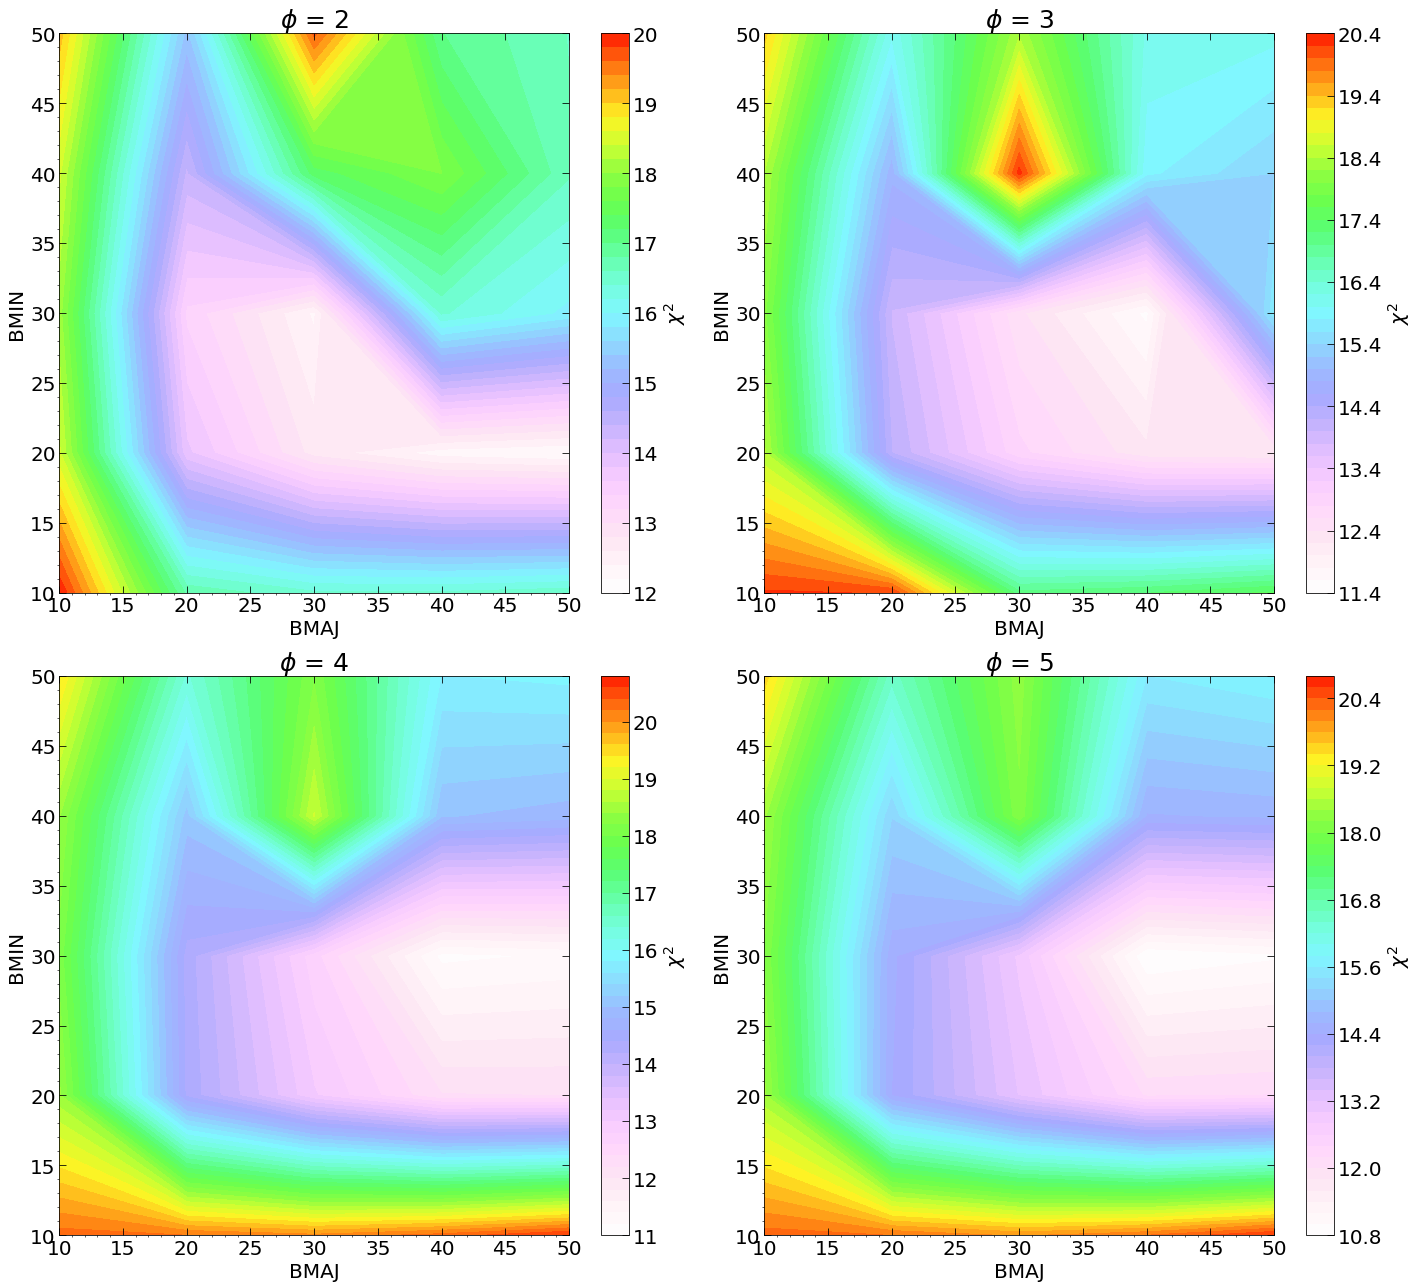

In [24]:
# Plotting the result
fig, ax = plt.subplots(2, 2, figsize=(20, 18))
 

# Loop over the first `num_plots` values of phi
for i, phi_fixed_index in enumerate(range(len(phi_values))):  

    BMAJ = BMAJ_grid[phi_fixed_index, :, :]  # Slice at fixed phi
    BMIN = BMIN_grid[phi_fixed_index, :, :]
    chi = CHI_grid[phi_fixed_index, :, :]
    
    row = i // 2  # Row index (0 or 1)
    col = i % 2   # Column index (0 or 1)
    
    # Create the contour plot
    contour = ax[row, col].contourf(BMAJ, BMIN, chi, 50, cmap=soft_colormap_v2)
    
    # Add colorbar
    cbar = fig.colorbar(contour, ax=ax[row, col], orientation='vertical')
    cbar.set_label(r'$\chi^2$', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")
    
    # Set title with actual c-value
    ax[row, col].set_title(rf'$\phi$ = {phi_values[phi_fixed_index]}', fontsize=title_fs)  

    # Labels
    ax[row, col].set_xlabel('BMAJ', fontsize=axis_label_fs)
    ax[row, col].set_ylabel('BMIN', fontsize=axis_label_fs)

    # Ticks
    ax[row, col].minorticks_on()
    ax[row, col].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[row, col].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.tight_layout()
plt.show()


### Contours of BMAJ and $\phi$ with constant BMIN

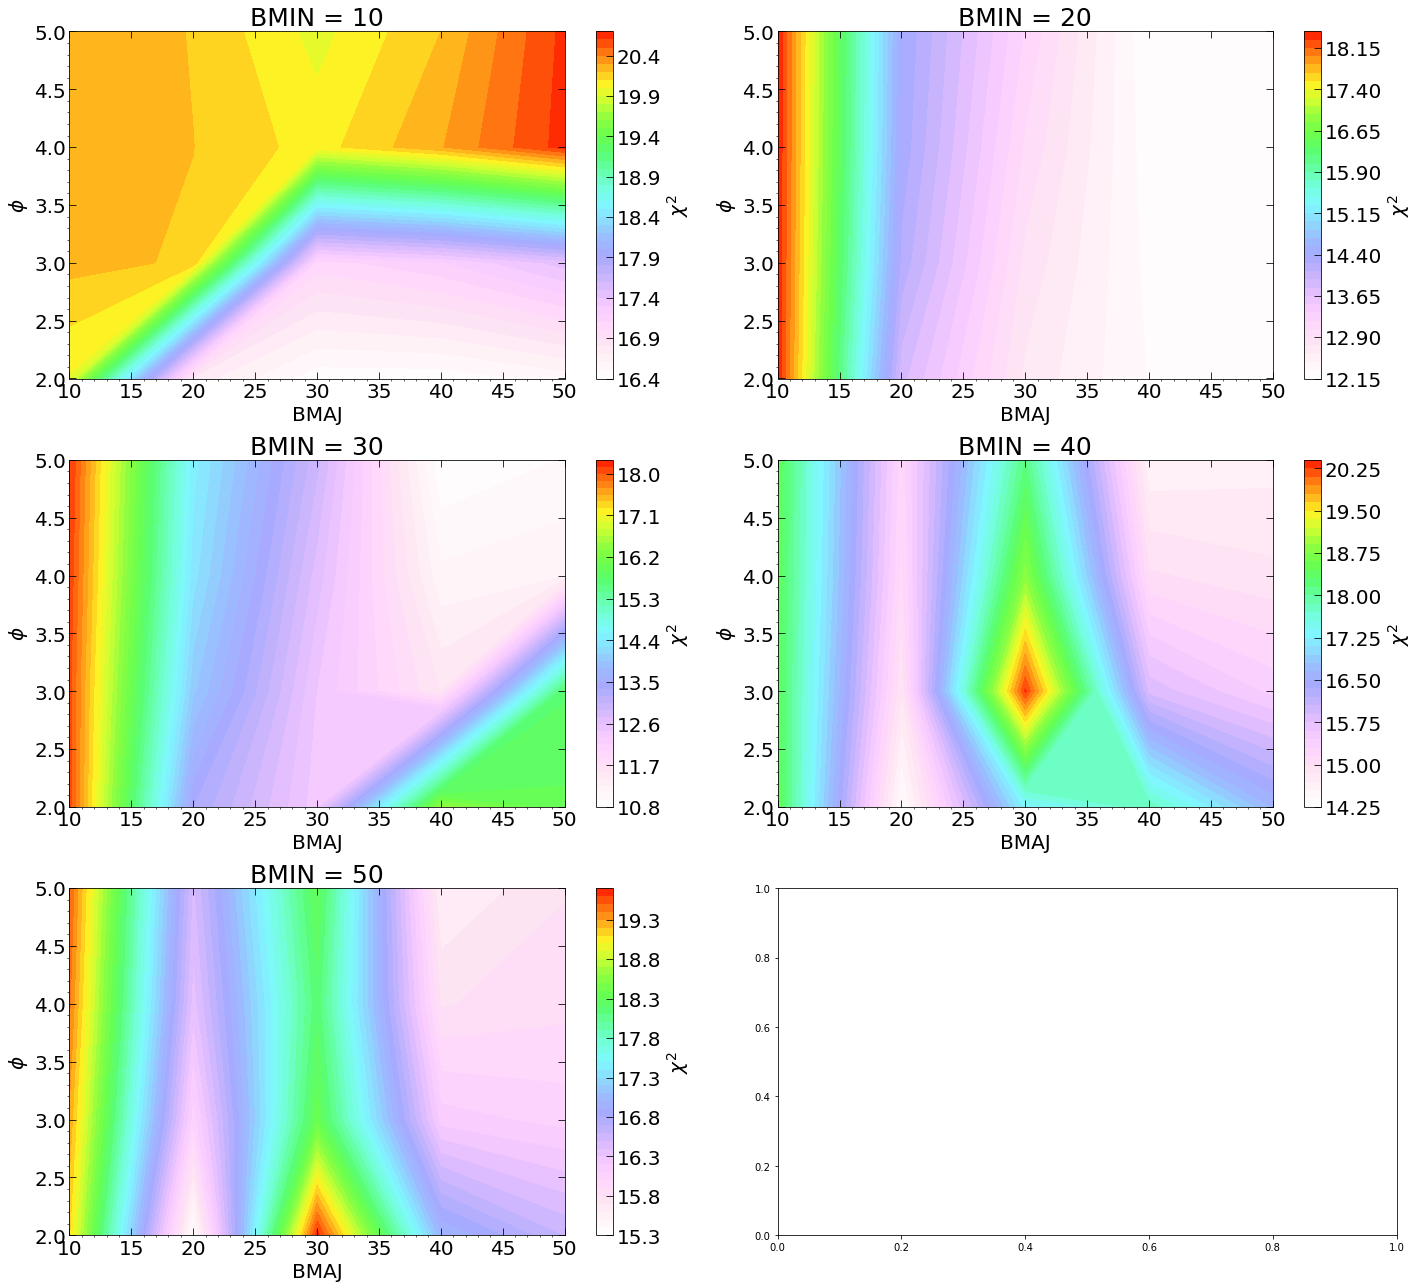

In [25]:
# Plotting the result
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
 

# Loop over the first `num_plots` values of phi
for i, BMIN_fixed_index in enumerate(range(len(BMIN_pix_values))):  

    phi = phi_grid[:, :, BMIN_fixed_index]
    BMAJ = BMAJ_grid[:, :, BMIN_fixed_index]  
    chi = CHI_grid[:, :, BMIN_fixed_index]
    
    row = i // 2  # Row index (0 or 1)
    col = i % 2   # Column index (0 or 1)
    
    # Create the contour plot
    contour = ax[row, col].contourf(BMAJ, phi, chi, 50, cmap=soft_colormap_v2)
    
    # Add colorbar
    cbar = fig.colorbar(contour, ax=ax[row, col], orientation='vertical')
    cbar.set_label(r'$\chi^2$', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")
    
    # Set title with actual c-value
    ax[row, col].set_title(rf'BMIN = {BMIN_pix_values[BMIN_fixed_index]}', fontsize=title_fs)  

    # Labels
    ax[row, col].set_xlabel('BMAJ', fontsize=axis_label_fs)
    ax[row, col].set_ylabel(r'$\phi$', fontsize=axis_label_fs)

    # Ticks
    ax[row, col].minorticks_on()
    ax[row, col].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[row, col].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.tight_layout()
plt.show()


### Contours of BMIN and $\phi$ with constant BMAJ

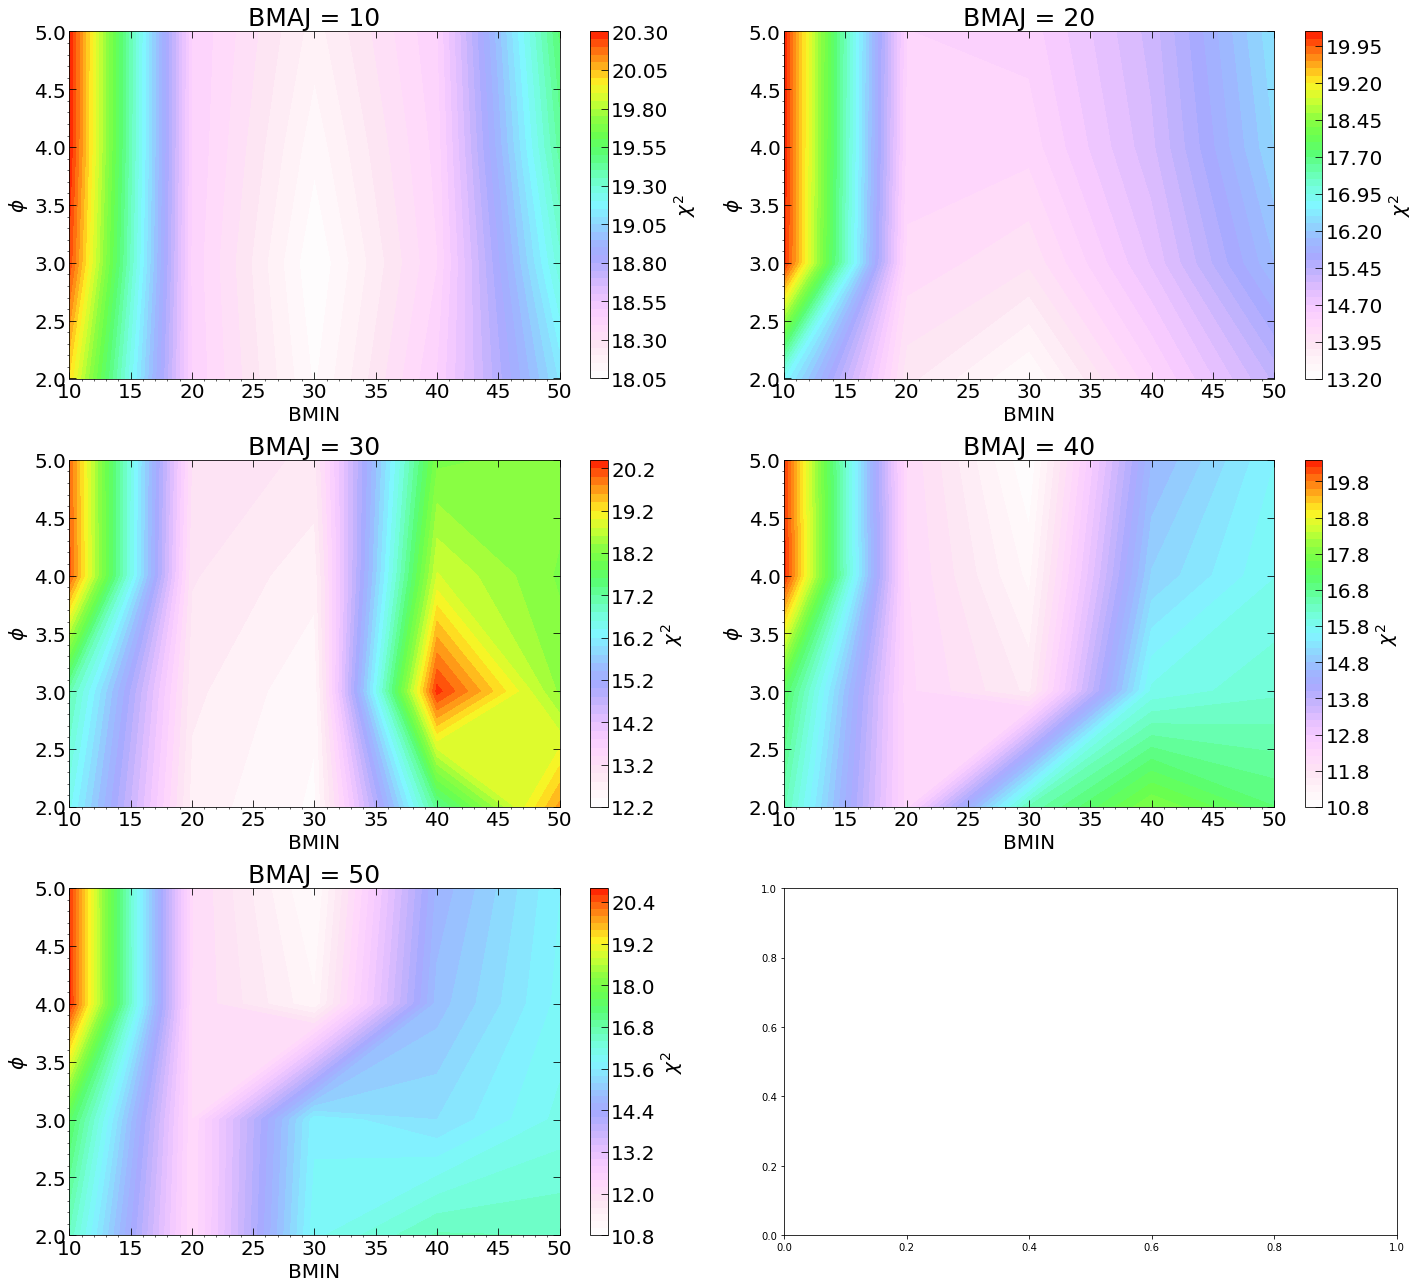

In [26]:
# Plotting the result
fig, ax = plt.subplots(3, 2, figsize=(20, 18))
 

# Loop over the first `num_plots` values of phi
for i, BMAJ_fixed_index in enumerate(range(len(BMAJ_pix_values))):  

    phi = phi_grid[:, BMAJ_fixed_index, :]
    BMIN = BMIN_grid[:, BMAJ_fixed_index, :]  
    chi = CHI_grid[:, BMAJ_fixed_index, :]
    
    row = i // 2  # Row index (0 or 1)
    col = i % 2   # Column index (0 or 1)
    
    # Create the contour plot
    contour = ax[row, col].contourf(BMIN, phi, chi, 50, cmap= soft_colormap_v2)
    
    # Add colorbar
    cbar = fig.colorbar(contour, ax=ax[row, col], orientation='vertical')
    cbar.set_label(r'$\chi^2$', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")
    
    # Set title with actual c-value
    ax[row, col].set_title(rf'BMAJ = {BMAJ_pix_values[BMAJ_fixed_index]}', fontsize=title_fs)  

    # Labels
    ax[row, col].set_xlabel('BMIN', fontsize=axis_label_fs)
    ax[row, col].set_ylabel(r'$\phi$', fontsize=axis_label_fs)

    # Ticks
    ax[row, col].minorticks_on()
    ax[row, col].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[row, col].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.tight_layout()
plt.show()


## 3D Contours

Start with the entire df

In [27]:
df = pd.DataFrame(results_test, columns=["phi", "BMAJ", "BMIN", "chi_squared"])

scaler = MinMaxScaler()

df["inv_chi_squared"] = 1 / df["chi_squared"]
df["chi_squared_norm"] = scaler.fit_transform(df[["chi_squared"]])
df["inv_chi_squared_norm"] = scaler.fit_transform(df[["inv_chi_squared"]])

In [28]:
df.head()

,phi,BMAJ,BMIN,chi_squared,inv_chi_squared,chi_squared_norm,inv_chi_squared_norm
0,2,10,10,19.989385,0.050027,0.933223,0.036117
1,2,10,20,18.442886,0.054221,0.775973,0.131328
2,2,10,30,18.091553,0.055274,0.740249,0.155227
3,2,10,40,18.450354,0.054200,0.776732,0.130830
4,2,10,50,19.105838,0.052340,0.843383,0.088625


Now we want some subset of the df where we only have values within 10% of the minimum value of $\chi^2$

In [29]:
# Find the minimum chi-squared value
min_chi2 = df["chi_squared"].min()

# Define threshold as threshold number % above the minimum
threshold_number = 50
threshold = min_chi2 * 1.50

In [30]:
# Create the subset DataFrame
df_subset = df[df["chi_squared"] <= threshold]

In [31]:
df_subset.head()

,phi,BMAJ,BMIN,chi_squared,inv_chi_squared,chi_squared_norm,inv_chi_squared_norm
6,2,20,20,13.848189,0.072212,0.308776,0.539649
7,2,20,30,13.348098,0.074917,0.257926,0.601054
8,2,20,40,14.348638,0.069693,0.359663,0.482485
9,2,20,50,15.328923,0.065236,0.459340,0.381328
11,2,30,20,12.712081,0.078665,0.193255,0.686128


### Plot

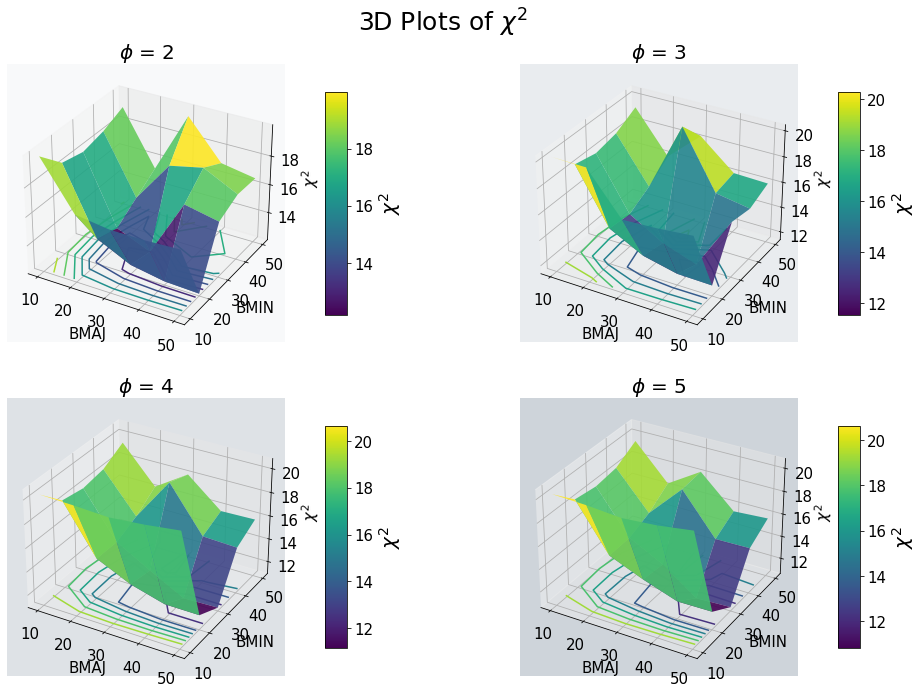

In [32]:
plot_3d_contours(df, z_col='chi_squared')

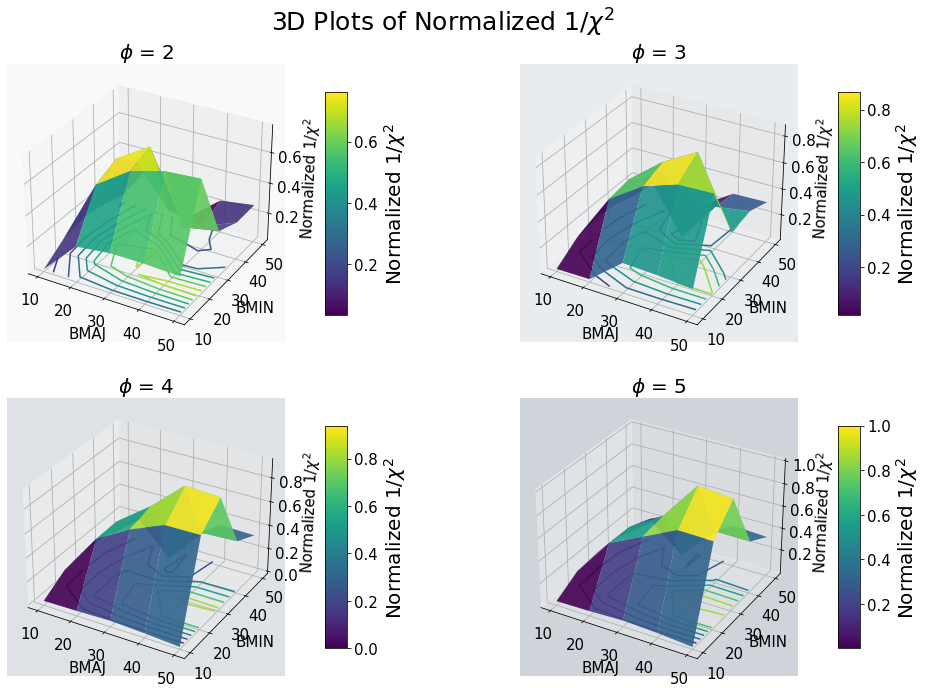

In [33]:
plot_3d_contours(df, z_col='inv_chi_squared_norm')